In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# Fetch data from Mysql
db =  mysql.connector.connect(host = 'localhost',username = 'root',password = '9651',database = 'ecommerce')
cur = db.cursor()


In [3]:
query = """select product_id,product_category from products """
cur.execute(query)
data = cur.fetchmany(5)

df  = pd.DataFrame(data, columns=["Product_id","Product_category"])

df

,Product_id,Product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,Art
2,96bd76ec8810374ed1b65e291975717f,sport leisure
3,cef67bcfe19066a932b7673e239eb23d,babies
4,9dc1a7de274444849c219cff195d0b71,housewares


In [29]:
# Q1. Calculate the number of orders per month in 2018
query = """ select monthname(order_purchase_timestamp) as months , count(order_id) as order_count from orders
 where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)
data = cur.fetchall()
df =  pd.DataFrame(data, columns = ["Months","Order_count"])

df

,Months,Order_count
0,July,25168
1,August,26048
2,February,26912
3,June,24668
4,March,28844
5,January,29076
6,May,27492
7,April,27756
8,September,64
9,October,16


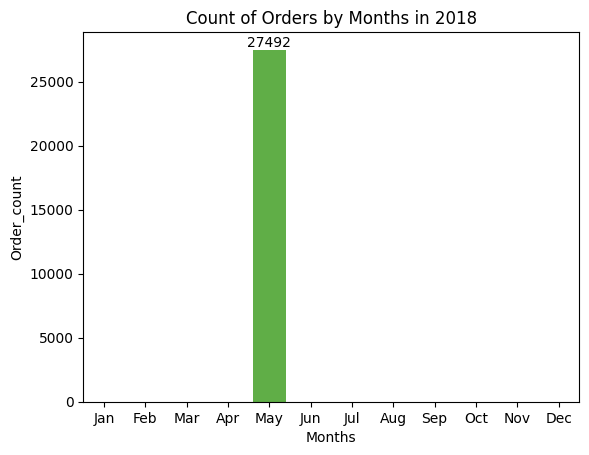

In [37]:
series = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax = sns.barplot(x = df["Months"], y = df["Order_count"], data = df,order  = series)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()

In [13]:
# Q2. Find the average number of Products per order, group by customer city.

query= """with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, avg(count_per_order.oc) as average_order from customers join count_per_order
on customers.customer_id =  count_per_order.customer_id
group by customers.customer_city order by average_order

"""

cur.execute(query)
data = cur.fetchall()

df =  pd.DataFrame(data, columns = ["Customer_city", "Average_order"])

df



,Customer_city,Average_order
0,alto sao joao,12.0000
1,campo alegre de minas,12.0000
2,manfrinopolis,12.0000
3,ulianopolis,12.0000
4,adustina,12.0000
...,...,...
4105,matias olimpio,60.0000
4106,candido godoi,72.0000
4107,datas,72.0000
4108,celso ramos,78.0000


In [21]:
# Q3. Calculate the percentage of total revenue contributed by each product category
query = """select products.product_category as category, 
round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2) as sales
from products join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category order by sales desc
"""

cur.execute(query)
data =  cur.fetchall()
df = pd.DataFrame(data,columns = ["Cateogry","Sales Percentage"])
df

,Cateogry,Sales Percentage
0,bed table bath,128.37
1,HEALTH BEAUTY,124.23
2,computer accessories,118.83
3,Furniture Decoration,107.20
4,Watches present,107.13
...,...,...
69,PC Gamer,0.16
70,House Comfort 2,0.13
71,cds music dvds,0.09
72,Fashion Children's Clothing,0.06


In [33]:
# Q4.  Identify the correlation between product price and the number of times a product has been purchased.
query = """select products.product_category as category, count(order_items.product_id),
round(avg(order_items.price),2) 
from products join order_items on products.product_id = order_items.product_id
group by category
"""
cur.execute(query)
data = cur.fetchall()

df  = pd.DataFrame(data,columns = ["Category","order_count","Price"])

#correlation between product price and order count.
arr1 = df["order_count"]
arr2 = df["Price"]
a = np.corrcoef([arr1,arr2])
print("The correlation between is",a[0][-1])

The correlation between is -0.10631514167157569


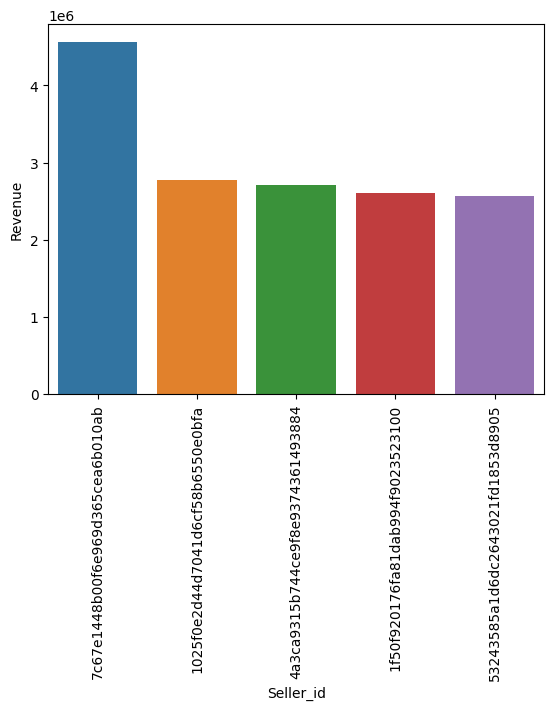

In [45]:
#Q5. Calculate the total revenue generated by each seller,and rank them by revenue.
query = """ select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)

revenue from order_items join payments on order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Seller_id","Revenue","Rank"])
df = df.head()
sns.barplot(x ="Seller_id",y="Revenue",data = df)
plt.xticks(rotation= 90)
plt.show()
